In [82]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

In [83]:
x,y = sklearn.datasets.make_moons(200, noise = 0.20)

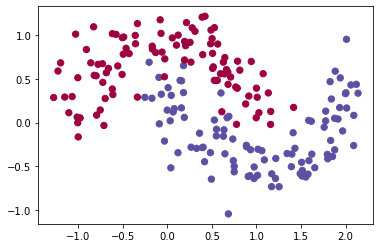

In [84]:
#cmap is a colored map
#this is non linear
plt.scatter(x[:, 0], x[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

In [85]:
#conver dataset to torch tensors
# x is float. use FloatTensor
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

In [86]:
#build neural network
#first build a class inherited from Module
class FeedForward(torch.nn.Module):
    # structure the network
    #__init__ has 2 _ _
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super(FeedForward,self).__init__()
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        self.out = nn.Linear(hidden_neurons,output_neurons)
    def forward(self, x):
        x = self.hidden(x)
        #use Relu activation
        x = F.relu(x)
        x = self.out(x)
        return x

In [87]:
# 2 coordinates represent 2 features
# build network, optimizer and loss function
network = FeedForward(input_neurons = 2, hidden_neurons = 50, output_neurons = 2)
optimizer = torch.optim.SGD(network.parameters(), lr = 0.02)
loss_function = torch.nn.CrossEntropyLoss()

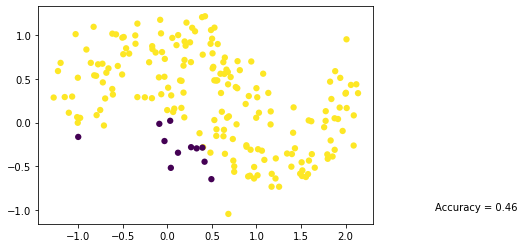

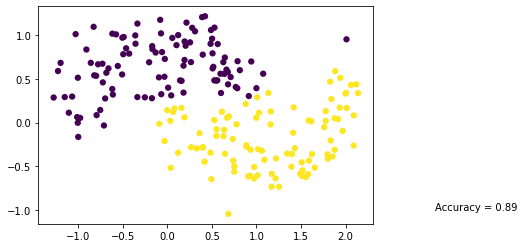

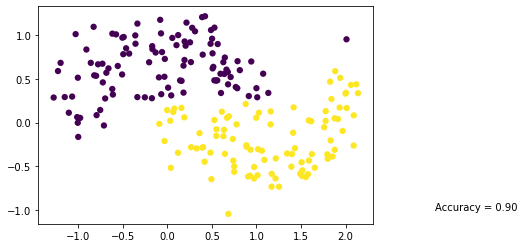

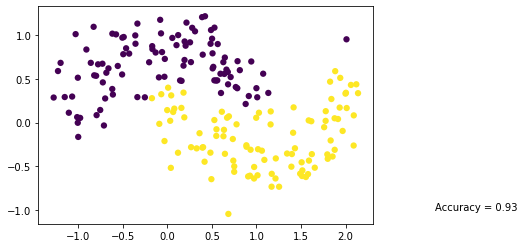

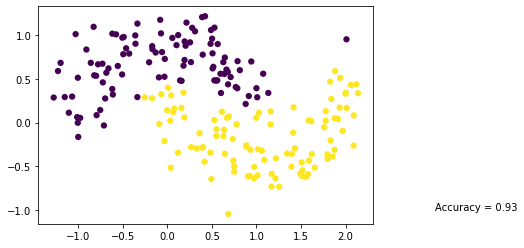

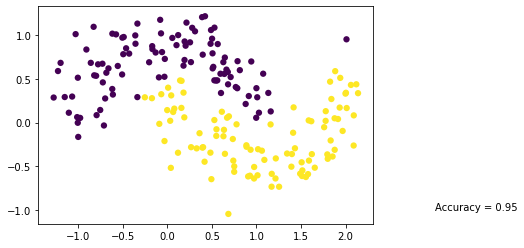

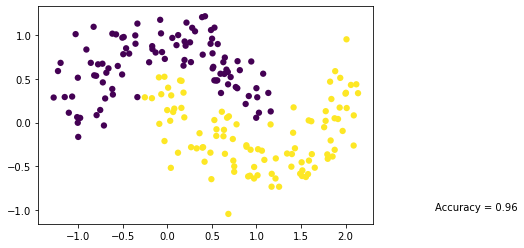

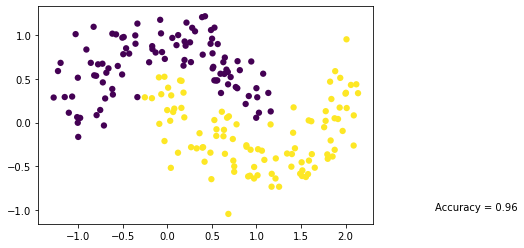

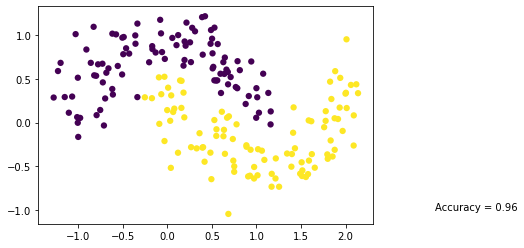

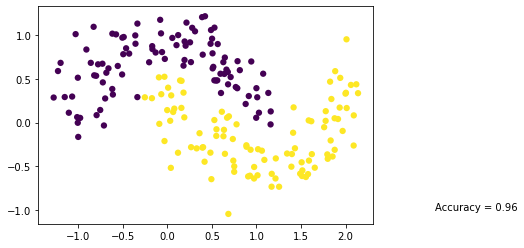

In [88]:
#train network while visualizing it 
plt.ion()
for epoch in range(10000):
    #out needs float type
    out = network.forward(x)
    
    #loss needs long type for CrossEntropyLoss
    loss = loss_function(out, y.long())
    optimizer.zero_grad()
    
    #backpropagation
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        #show the learning process up until now. (max, prediction)
        max_value, prediction = torch.max(out, 1)
        #convert prediction to Numpy array
        predicted_y = prediction.data.numpy()
        #compare predicted with actual. Also need convert actual to Numpy
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:, 1], s = 40, c=predicted_y, lw = 0)
        #accurancy, will return 0 and 1 and sum up. 0 is false, 1 is true
        accuracy = (predicted_y == target_y).sum() / target_y.size
        #use string format and keep 2 digits after the .
        plt.text(3, -1, 'Accuracy = {:.2f}'.format(accuracy, fontdict = {'size':14}))
        plt.pause(0.5)
        
plt.ioff()
plt.show()